<center> </center>

<center><font size=5 face="Helvetica" color=#306998><b>
MPB Tutorial: Band Structure of 2D Photonic Crystals
</b></font></center>

<center><font face="Helvetica" size=3><b>Ang Chen</b></font></center>
<center><font face="Helvetica" size=3>December, 2024</font></center>

***

In [6]:
import matplotlib.pyplot as plt
import numpy as np

from meep import mpb
import meep as mp


# plt.rcParams["font.family"] = "Helvetica" 
%matplotlib inline
%config InlineBackend.figure_format='svg'

In this tutorial, we will simulate the examples in Chap. 5, [Photonic Crystals: Molding the Flow of Light](http://ab-initio.mit.edu/book/photonic-crystals-book.pdf).

# Photonic band structure for a square arrya

In [7]:
num_bands = 5

k_points_Gamma2X = [
    mp.Vector3(),          # Gamma
    mp.Vector3(0.5),       # X
]

k_points_X2M = [
    mp.Vector3(0.5),       # X
    mp.Vector3(0.5, 0.5),  # M
]

k_points_M2Gamma = [
    mp.Vector3(0.5, 0.5),  # M
    mp.Vector3(),          # Gamma
]

points_interp = 30
k_points_Gamma2X = mp.interpolate(points_interp, k_points_Gamma2X)
k_points_X2M = mp.interpolate(points_interp, k_points_X2M)
k_points_M2Gamma = mp.interpolate(int(points_interp*np.sqrt(2)), k_points_M2Gamma)

k_points = k_points_Gamma2X + k_points_X2M[:-1] + k_points_M2Gamma[:-1]


In [8]:
geometry = [mp.Cylinder(0.2, material=mp.Medium(epsilon=8.9))]
geometry_lattice = mp.Lattice(size=mp.Vector3(1, 1))

resolution = 32

ms = mpb.ModeSolver(
    num_bands=num_bands,
    k_points=k_points,
    geometry=geometry,
    geometry_lattice=geometry_lattice,
    resolution=resolution,
)


In [9]:
ms.run_tm()
tm_freqs = ms.all_freqs

ms.run_te()
te_freqs = ms.all_freqs


Initializing eigensolver data
Computing 5 bands with 1e-07 tolerance
Working in 2 dimensions.
Grid size is 32 x 32 x 1.
Solving for 5 bands at a time.
Creating Maxwell data...
Mesh size is 3.
Lattice vectors:
     (1, 0, 0)
     (0, 1, 0)
     (0, 0, 1)
Cell volume = 1
Reciprocal lattice vectors (/ 2 pi):
     (1, -0, 0)
     (-0, 1, -0)
     (0, -0, 1)
Geometric objects:
     cylinder, center = (0,0,0)
          radius 0.2, height 1e+20, axis (0, 0, 1)
Geometric object tree has depth 1 and 1 object nodes (vs. 1 actual objects)
Initializing epsilon function...
Allocating fields...
Solving for band polarization: tm.
Initializing fields to random numbers...
106 k-points
  Vector3<0.0, 0.0, 0.0>
  Vector3<0.016129032258064516, 0.0, 0.0>
  Vector3<0.03225806451612903, 0.0, 0.0>
  Vector3<0.04838709677419355, 0.0, 0.0>
  Vector3<0.06451612903225806, 0.0, 0.0>
  Vector3<0.08064516129032258, 0.0, 0.0>
  Vector3<0.0967741935483871, 0.0, 0.0>
  Vector3<0.11290322580645161, 0.0, 0.0>
  Vector3<0

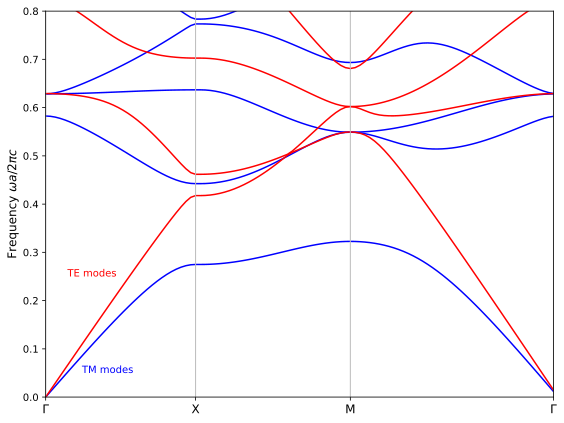

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
x = range(len(tm_freqs))

## Plot method 1
ax.plot(x, tm_freqs, color="blue", lw=1.5)
ax.plot(x, te_freqs, color="red", lw=1.5)

## Plot method 2
# ax.plot(x, tm_freqs, 'o', color="blue", markerfacecolor='none', ms=3)
# ax.plot(x, te_freqs, 'o', color="red", markerfacecolor='none', ms=3)

## Plot method 3
# for xz, tmz, tez in zip(x, tm_freqs, te_freqs):
#     ax.scatter([xz] * len(tmz), tmz, color="blue", facecolors="none", s=8)
#     ax.scatter([xz] * len(tez), tez, color="red", facecolors="none", s=8)


ax.set_ylim([0, 0.8])
ax.set_xlim([x[0], x[-1]])

tick_locs = [0, len(k_points_Gamma2X) - 1, len(k_points_Gamma2X) + len(k_points_X2M) - 1, len(k_points) - 1]
tick_labs = [r"$\Gamma$", "X", "M", r"$\Gamma$"]
ax.set_xticks(tick_locs)
ax.set_xticklabels(tick_labs, size=12)
ax.set_ylabel(r"Frequency $\omega a/2\pi c$", size=12)
# ax.grid(True, color="black", linestyle="--", alpha=0.5)
for x in tick_locs:
    ax.axvline(x, color="#bbb", lw=1)

ax.text(7.5, 0.05, "TM modes", color="blue")
ax.text(4.5, 0.25, "TE modes", color="red")

fig.tight_layout()
plt.show()
